In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import numpy as np
import jax.numpy as jnp

import seaborn as sns
sns.set_context('paper', font_scale = 1.5)
sns.color_palette('colorblind')

import h5py

In [2]:
import GC_rates

In [3]:
GC_data = GC_rates.read_data()

In [4]:
def plot_cluster_rate(zmin, zmax, dz = 0.2, z_gc = 3.5, a = 3, b = 3, sigma_dex = 0.5, Zsun = 0.02,
                     mu_rv = 1.5, sigma_rv = 1.5, beta = -2, logMstar0 = 6.26, rho_GC = 7.3e14,
                     logDelta = 5.33, logMlo = 2, logMhi = 8, average_M_evolved = 3.2e5, plot_kwargs = {}):
    z_c = np.arange(zmin, zmax + dz, step = dz)
    R_z_c = [GC_rates.merger_rate_at_z_pop_selfconsistentfactors(
        GC_data, z, z_gc, a, b, sigma_dex, Zsun, mu_rv, sigma_rv, beta, logMstar0, rho_GC, logDelta, logMlo, logMhi, average_M_evolved) for z in z_c]
    
    plt.plot(z_c, R_z_c, **plot_kwargs)
    plt.xlabel(r'redshift $z$')
    plt.xlim(zmin, zmax)
    plt.ylabel(r'$\mathcal{R}(z)$')
    plt.yscale('log')

In [5]:
with h5py.File('GW_dynrate_z0_z1.h5', 'r') as inp:
    GW_R0_post = np.array(inp['dyn_rate_z0'])
    GW_R1_post = np.array(inp['dyn_rate_z1'])
    
with h5py.File('GW_dynrate_versus_z.h5', 'r') as inp:
    dyn_rate = np.array(inp['dyn_rate'])
    z_plot = np.array(inp['z'])
    total_rate = np.array(inp['total_rate'])

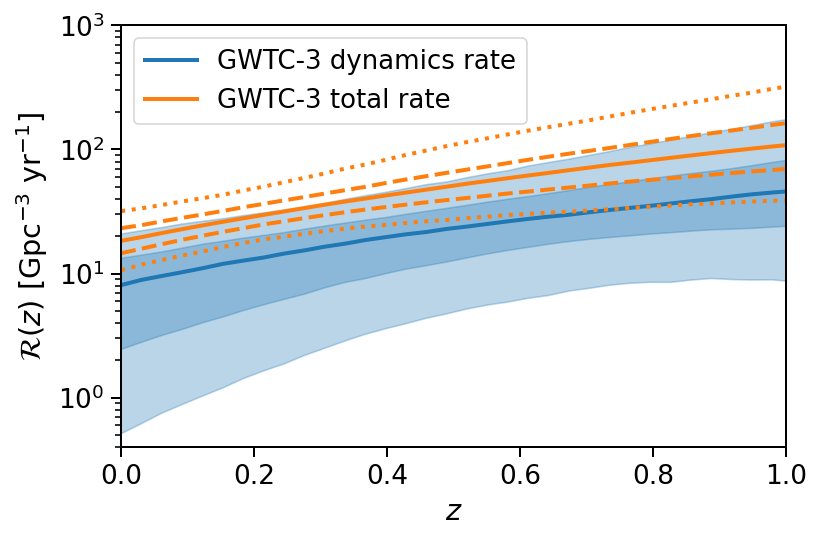

In [6]:
plt.plot(z_plot, np.percentile(dyn_rate, 50, axis = 0), label = 'GWTC-3 dynamics rate', linewidth = 2.0)
plt.fill_between(z_plot, np.percentile(dyn_rate, 5, axis = 0), np.percentile(dyn_rate, 95, axis = 0), alpha = 0.3, color = sns.color_palette()[0])
plt.fill_between(z_plot, np.percentile(dyn_rate, 25, axis = 0), np.percentile(dyn_rate, 75, axis = 0), alpha = 0.3, color = sns.color_palette()[0])

plt.plot(z_plot, np.percentile(total_rate, 50, axis = 0), label = 'GWTC-3 total rate', linewidth = 2.0, color = sns.color_palette()[1])
plt.plot(z_plot, np.percentile(total_rate, 5, axis = 0), color = sns.color_palette()[1], ls = ':', linewidth = 2.0)
plt.plot(z_plot, np.percentile(total_rate, 95, axis = 0), color = sns.color_palette()[1], ls = ':', linewidth = 2.0)
plt.plot(z_plot, np.percentile(total_rate, 25, axis = 0), color = sns.color_palette()[1], ls = '--', linewidth = 2.0)
plt.plot(z_plot, np.percentile(total_rate, 75, axis = 0), color = sns.color_palette()[1], ls = '--', linewidth = 2.0)


plt.yscale('log')
plt.ylim(4e-1,1e3)
plt.xlim(min(z_plot), 1)

plt.xlabel(r'$z$')
plt.ylabel(r'$\mathcal{R}(z)$ [Gpc$^{-3}$ yr$^{-1}$]')
plt.legend(loc = 'upper left', fontsize = 13)

plt.tight_layout()
plt.savefig('GWTC3_dynamicsrate_totalrate.pdf')

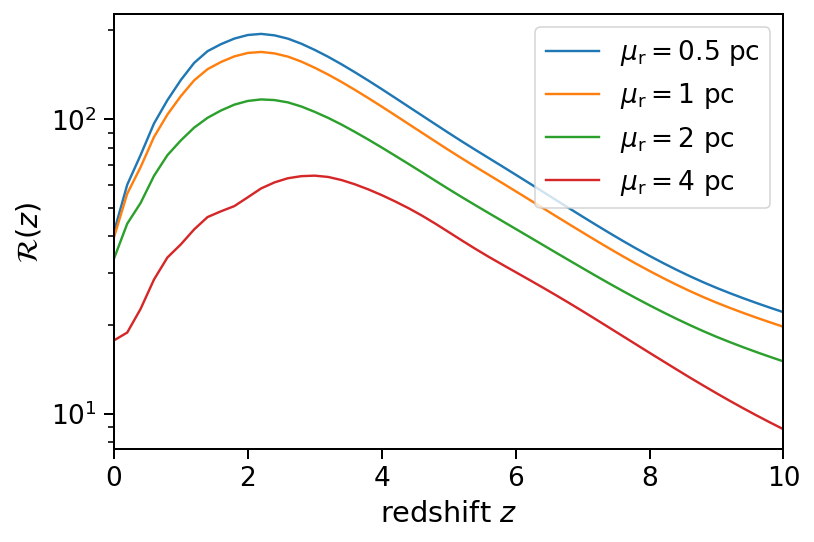

In [7]:
plot_cluster_rate(0, 10, mu_rv = 0.5, sigma_rv = 1, plot_kwargs = dict(label = r'$\mu_\mathrm{r} = 0.5$ pc'))

plot_cluster_rate(0, 10, mu_rv = 1, sigma_rv = 1, plot_kwargs = dict(label = r'$\mu_\mathrm{r} = 1$ pc'))

plot_cluster_rate(0, 10, mu_rv = 2, sigma_rv = 1, plot_kwargs = dict(label = r'$\mu_\mathrm{r} = 2$ pc'))

plot_cluster_rate(0, 10, mu_rv = 4, sigma_rv = 1, plot_kwargs = dict(label = r'$\mu_\mathrm{r} = 4$ pc'))


plt.legend(loc = 'best')

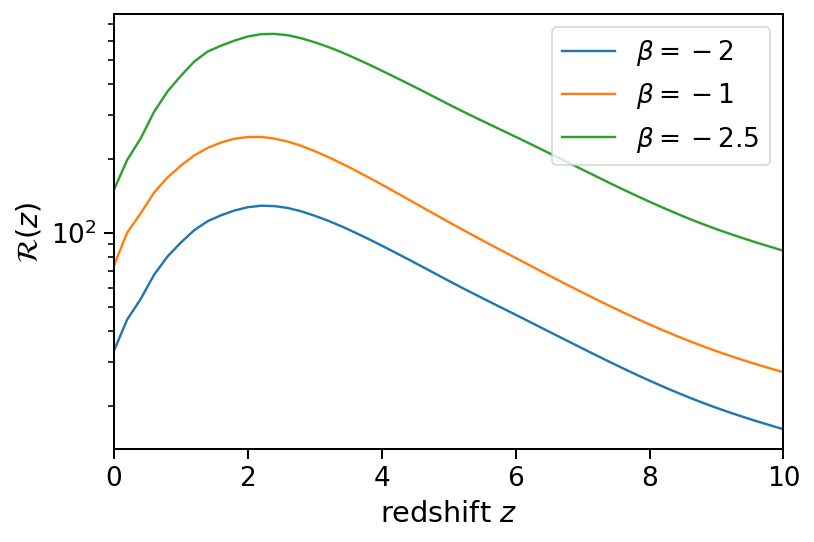

In [8]:
plot_cluster_rate(0, 10, beta = -2, plot_kwargs = dict(label = r'$\beta = -2$'))

plot_cluster_rate(0, 10, beta = -1, plot_kwargs = dict(label = r'$\beta = -1$'))

plot_cluster_rate(0, 10, beta = -2.5, plot_kwargs = dict(label = r'$\beta = -2.5$'))

plt.legend(loc = 'best')

##beta = -2.5 is higher because contribution from disrupted clusters is much higher!

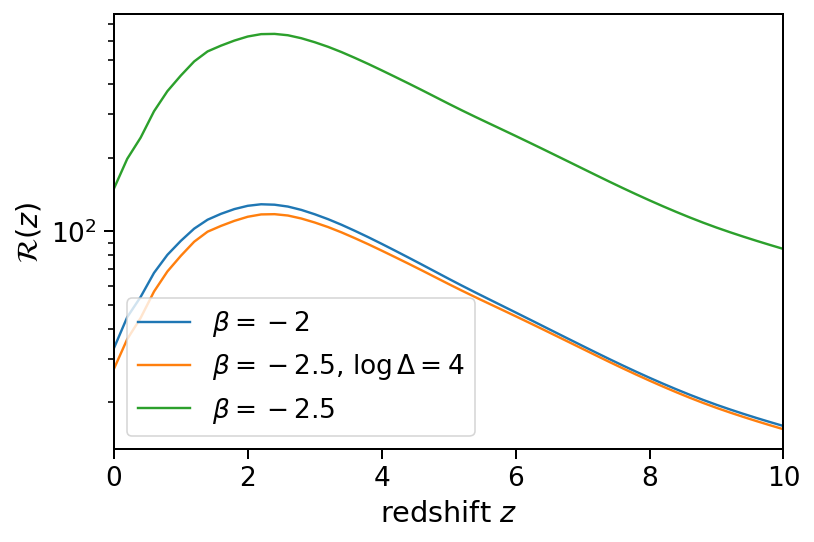

In [9]:
plot_cluster_rate(0, 10, beta = -2, plot_kwargs = dict(label = r'$\beta = -2$'))

plot_cluster_rate(0, 10, beta = -2.5, logDelta = 4, plot_kwargs = dict(label = r'$\beta = -2.5$, $\log\Delta = 4$'))

plot_cluster_rate(0, 10, beta = -2.5, plot_kwargs = dict(label = r'$\beta = -2.5$'))

plt.legend(loc = 'best')

##degeneracy between beta and Delta. 

In [10]:
beta=-2.4


dNdV0 = GC_rates.cluster_number_density_from_mass_density(beta = beta)
    
f_missing_cluster = GC_rates.compute_missing_cluster_factor(beta = beta)
    
f_disrupted_cluster = GC_rates.compute_disrupted_cluster_factor(beta = beta)

dNdV0, f_missing_cluster, f_disrupted_cluster, f_missing_cluster * f_disrupted_cluster

(DeviceArray(4.1309187e+09, dtype=float32),
 DeviceArray(2.508927, dtype=float32),
 DeviceArray(9.445197, dtype=float32),
 DeviceArray(23.697311, dtype=float32))

In [11]:
beta=-1


dNdV0 = GC_rates.cluster_number_density_from_mass_density(beta = beta)
    
f_missing_cluster = GC_rates.compute_missing_cluster_factor(beta = beta)
    
f_disrupted_cluster = GC_rates.compute_disrupted_cluster_factor(beta = beta)

dNdV0, f_missing_cluster, f_disrupted_cluster, f_missing_cluster * f_disrupted_cluster

(DeviceArray(1.6422648e+09, dtype=float32),
 DeviceArray(3.6880014, dtype=float32),
 DeviceArray(1.5881805, dtype=float32),
 DeviceArray(5.857212, dtype=float32))

In [12]:
logDelta = 5.33
logMstar0 = 6.26

dNdV0 = GC_rates.cluster_number_density_from_mass_density(logMstar0 = logMstar0, logDelta = logDelta)
    
f_missing_cluster = GC_rates.compute_missing_cluster_factor(logMstar0 = logMstar0)
    
f_disrupted_cluster = GC_rates.compute_disrupted_cluster_factor(logMstar0 = logMstar0, logDelta = logDelta)

dNdV0, f_missing_cluster, f_disrupted_cluster, f_missing_cluster * f_disrupted_cluster

(DeviceArray(3.2575532e+09, dtype=float32),
 DeviceArray(1.7991822, dtype=float32),
 DeviceArray(3.5659533, dtype=float32),
 DeviceArray(6.4157996, dtype=float32))

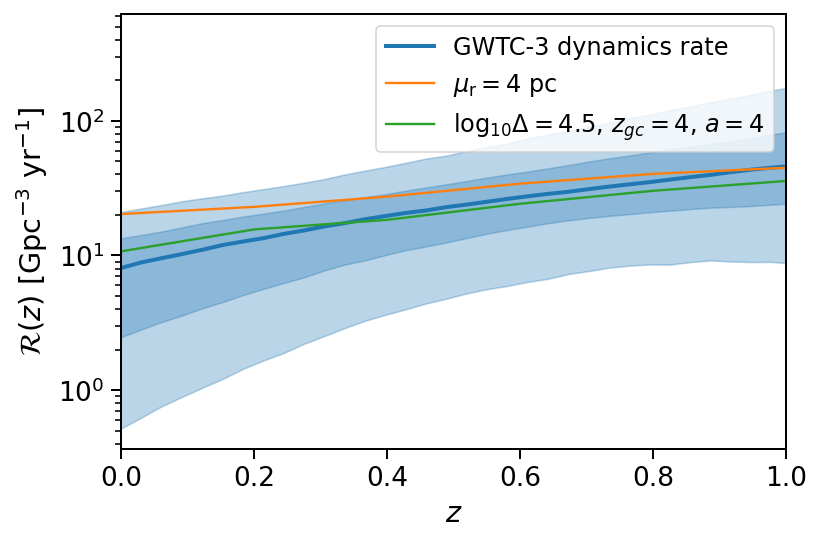

In [25]:
plt.plot(z_plot, np.percentile(dyn_rate, 50, axis = 0), label = 'GWTC-3 dynamics rate', linewidth = 2.0)
plt.fill_between(z_plot, np.percentile(dyn_rate, 5, axis = 0), np.percentile(dyn_rate, 95, axis = 0), alpha = 0.3, color = sns.color_palette()[0])
plt.fill_between(z_plot, np.percentile(dyn_rate, 25, axis = 0), np.percentile(dyn_rate, 75, axis = 0), alpha = 0.3, color = sns.color_palette()[0])




plot_cluster_rate(0, 1, mu_rv = 4, sigma_rv = 1.5, plot_kwargs = dict(label = r'$\mu_\mathrm{r} = 4$ pc'))
plot_cluster_rate(0, 1, mu_rv = 1.5, sigma_rv = 1.5, logDelta = 4.5, z_gc = 4, a = 4, plot_kwargs = dict(label = r'$\log_{10}\Delta = 4.5$, $z_{gc} = 4$, $a = 4$'))




plt.yscale('log')
plt.xlim(min(z_plot), 1)

plt.xlabel(r'$z$')
plt.ylabel(r'$\mathcal{R}(z)$ [Gpc$^{-3}$ yr$^{-1}$]')
plt.legend(loc = 'best', fontsize = 12)

plt.tight_layout()